In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bread_basket=pd.read_csv('data/bread_basket.csv')

print(bread_basket.head())

   TransactionNo          Items             DateTime  Daypart  DayType
0              1          Bread  2016-10-30 09:58:11  Morning  Weekend
1              2   Scandinavian  2016-10-30 10:05:34  Morning  Weekend
2              2   Scandinavian  2016-10-30 10:05:34  Morning  Weekend
3              3  Hot chocolate  2016-10-30 10:07:57  Morning  Weekend
4              3            Jam  2016-10-30 10:07:57  Morning  Weekend


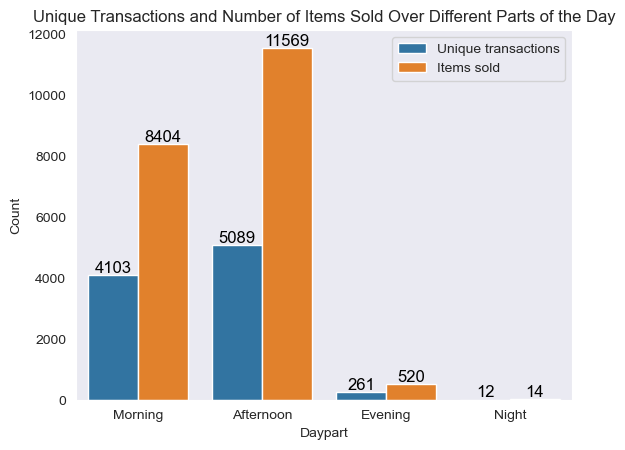

In [176]:
unique_daypart_counts = bread_basket.groupby('Daypart')['TransactionNo'].nunique().reset_index(name='Count')
unique_daypart_counts["unique"]='Unique transactions'

items_sold_per_daypart = bread_basket.groupby('Daypart')['Items'].count().reset_index(name='Count')
items_sold_per_daypart["unique"]='Items sold'

new_data=pd.concat([unique_daypart_counts,items_sold_per_daypart])
daypart_order = ['Morning', 'Afternoon', 'Evening', 'Night']
new_data["Daypart"]=pd.Categorical(new_data["Daypart"],daypart_order)

sns.set_style("dark")

ax=sns.barplot(x='Daypart', y='Count', data=new_data, hue='unique')

plt.title('Unique Transactions and Number of Items Sold Over Different Parts of the Day')
plt.xlabel('Daypart')
plt.ylabel('Count')
plt.legend()
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.0f}',(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0,5), textcoords='offset points')

plt.show()


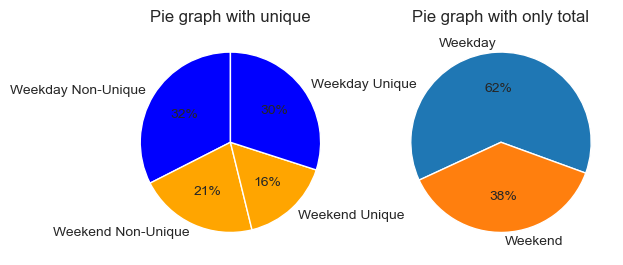

In [223]:
total_daytype=bread_basket.groupby('DayType')['TransactionNo'].count()
unique_daytype=bread_basket.groupby('DayType')['TransactionNo'].nunique()
non_unique_daytype=total_daytype-unique_daytype

unique_daytype.index=["Weekday Unique" if idx == "Weekday" else "Weekend Unique" for idx in unique_daytype.index]
non_unique_daytype.index=["Weekday Non-Unique" if idx == "Weekday" else "Weekend Non-Unique" for idx in non_unique_daytype.index]

plt.subplot(1, 2, 1)
plt.title('Pie graph with unique')

total_daytype_sep=pd.concat([unique_daytype,non_unique_daytype])

colors = ['blue', 'orange', 'orange', 'blue']
new_order = ['Weekday Non-Unique', 'Weekend Non-Unique', 'Weekend Unique', 'Weekday Unique']
ordered_sizes = [total_daytype_sep[idx] for idx in new_order]
ordered_labels = new_order

plt.pie(ordered_sizes,labels=ordered_labels,autopct='%1.0f%%',startangle=90, colors=colors)

plt.subplot(1, 2, 2)
plt.pie(total_daytype,labels=total_daytype.index,autopct='%1.0f%%',startangle=-20)
plt.title("Pie graph with only total")
plt.show()

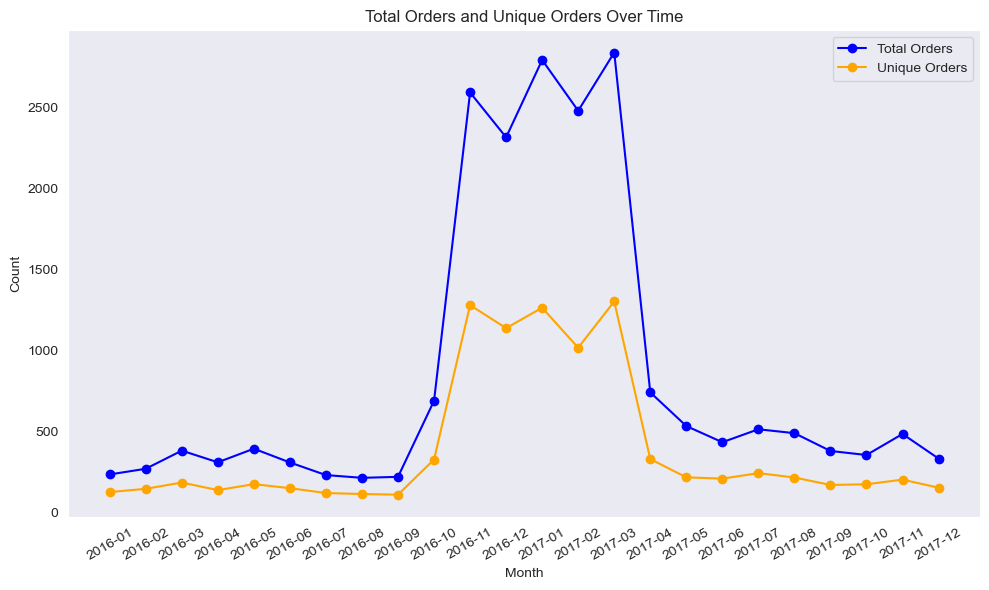

In [239]:
total_orders = bread_basket.groupby(bread_basket['DateTime'].dt.to_period('M')).size()
unique_orders = bread_basket.groupby(bread_basket['DateTime'].dt.to_period('M'))['TransactionNo'].nunique()

result = pd.DataFrame({
    'Total Orders': total_orders,
    'Unique Orders': unique_orders
})
plt.figure(figsize=(10, 6))
plt.plot(result.index.astype(str), result['Total Orders'], label='Total Orders', marker='o', color='blue')
plt.plot(result.index.astype(str), result['Unique Orders'], label='Unique Orders', marker='o', color='orange')

plt.title('Total Orders and Unique Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

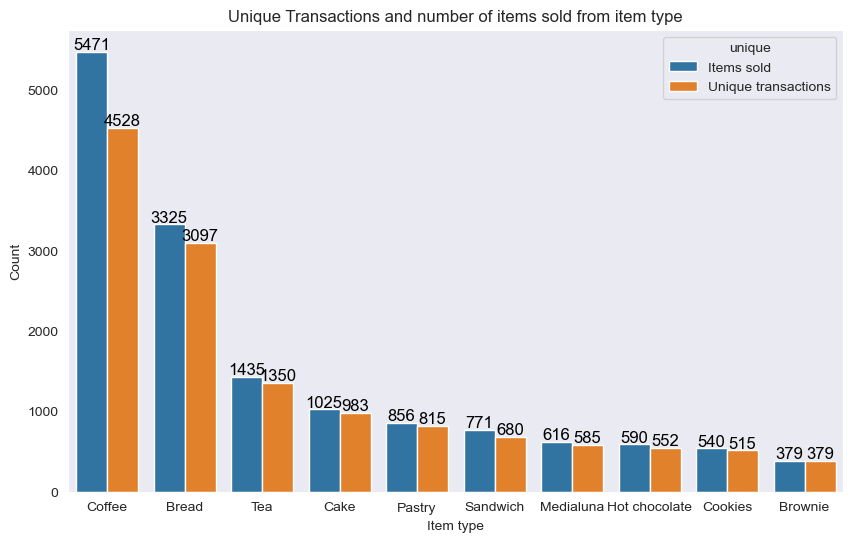

In [298]:
top_items=bread_basket.groupby('Items').size().reset_index(name='Count')
top_items["unique"]='Items sold'

top_unique_items=bread_basket.groupby('Items')['TransactionNo'].nunique().reset_index(name='Count')
top_unique_items["unique"]='Unique transactions'

top_items_sorted = top_items.nlargest(10, 'Count')

top_unique_items_sorted = top_unique_items[top_unique_items['Items'].isin(top_items_sorted['Items'])]

new_data=pd.concat([top_items_sorted, top_unique_items_sorted])

sns.set_style("dark")
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Items', y='Count', data=new_data, hue='unique')
plt.title('Unique Transactions and number of items sold from item type')
plt.xlabel('Item type')
plt.ylabel('Count')
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.0f}',(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0,5), textcoords='offset points')

plt.show()


C:\Users\Josiah\AppData\Local\Temp\ipykernel_33224\321280307.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  co_occurrence_matrix[item1][item2]+=1
C:\Users\Josiah\AppData\Local\Temp\ipykernel_33224\321280307.py:20: FutureWarning: Chaine

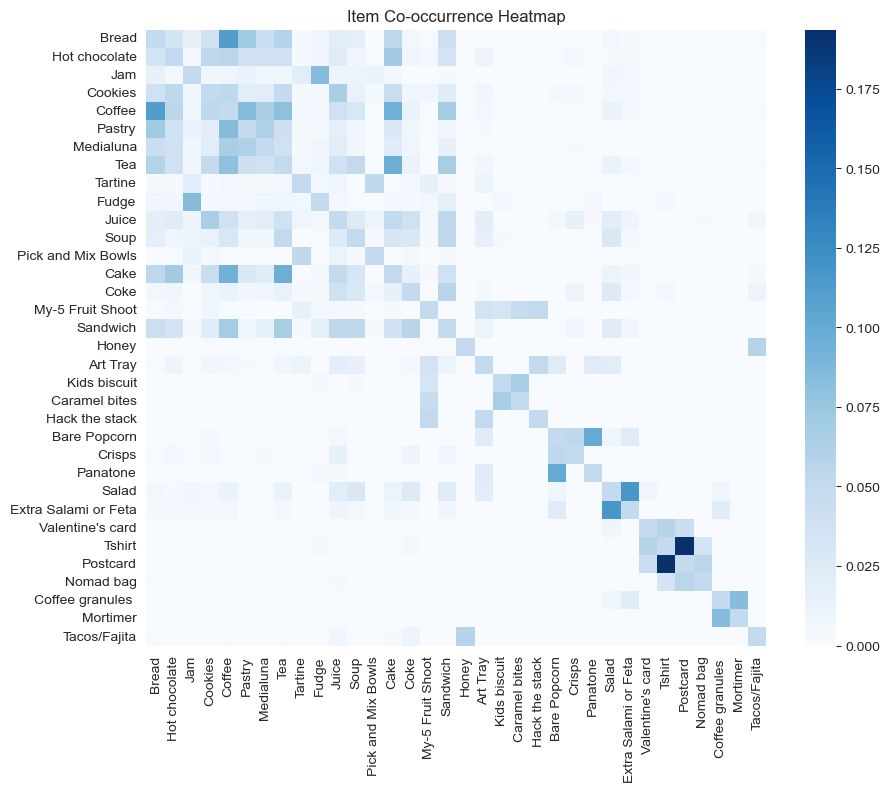

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bread_basket=pd.read_csv('data/bread_basket.csv')
items = bread_basket['Items'].unique()

co_occurrence_matrix = pd.DataFrame(0,columns=items, index=items)

orders=bread_basket.groupby('TransactionNo')['Items'].unique()


occurrences= {i:0 for i in items}

for order in orders:
    for pos,item1 in enumerate(order):
        for item2 in order[pos:]:
            co_occurrence_matrix[item1][item2]+=1
            co_occurrence_matrix[item2][item1]+=1

        occurrences[item1]+=1

threshold=0.05

for row in co_occurrence_matrix.index:
    for col in co_occurrence_matrix.columns:
        if row!=col:
            co_occurrence_matrix.loc[row,col]=co_occurrence_matrix.loc[row,col]/(occurrences[row]+occurrences[col])
        else:
            co_occurrence_matrix.loc[row,col]=threshold-(threshold/100)

rows_to_drop = co_occurrence_matrix.max(axis=1) < threshold
columns_to_drop = co_occurrence_matrix.max(axis=0) < threshold

co_occurrence_matrix_cleaned = co_occurrence_matrix.loc[~rows_to_drop, ~columns_to_drop]

sns.set_style(style='white')
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix_cleaned, annot=False, cmap='Blues')
plt.title('Item Co-occurrence Heatmap')
plt.show()
